In [6]:
!pip install requests
!pip install html5lib
!pip install bs4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1270 sha256=04e37d3e0ccd80df25138797a2d3914a60839035f677736e5852caaac3b7448d
  Stored in directory: /root/.cache/pip/wheels/73/2b/cb/099980278a0c9a3e57ff1a89875ec07bfa0b6fcbebb9a8cad3
Successfully built bs4


In [9]:
import pandas as pd

df = pd.read_csv('crime_data.txt', delimiter='\t',error_bad_lines=False)


<ipython-input-9-2c8511bfb630>:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('crime_data.txt', delimiter='\t',error_bad_lines=False)


In [10]:
import re

def get_crime_and_safety(name_or_pincode):
    row = None
    if name_or_pincode.isdigit():
        row = df[df['Rank'] == int(name_or_pincode)]
    else:
        # Use regular expression to match the city name
        regex = re.compile('.*' + re.escape(name_or_pincode) + '.*', re.IGNORECASE)
        row = df[df['City'].str.match(regex)]
    if len(row) == 0:
        return None
    else:
        crime_index = row['Crime Index'].iloc[0]
        safety_index = row['Safety Index'].iloc[0]
        return crime_index, safety_index


In [22]:
import pandas as pd
  
# read text file into pandas DataFrame
df = pd.read_fwf("crime_data.txt",sep=',')
  
# display DataFrame
#print((df))
# dataframe=pd.Dataframe(df)
# print(dataframe)
# df = df.drop(columns=[0])

# Convert the dataframe to a 2D numpy array
data = df.values

# Print the resulting array
print(data)

[['2\tPretoria, South Africa\t82.0\t18.0']
 ['3\tDurban, South Africa\t81.0\t19.0']
 ['4\tPort Moresby, Papua New Guinea\t80.7\t19.3']
 ['5\tJohannesburg, South Africa\t80.7\t19.3']
 ['6\tSan Pedro Sula, Honduras\t80.5\t19.5']
 ['7\tKabul, Afghanistan\t79.8\t20.2']
 ['8\tRio de Janeiro, Brazil\t77.6\t22.4']
 ['9\tFortaleza, Brazil\t77.3\t22.7']
 ['10\tNatal, Brazil\t77.2\t22.8']
 ['11\tPort Elizabeth, South Africa\t76.9\t23.1']
 ['12\tSalvador, Brazil\t76.6\t23.4']
 ['13\tRecife, Brazil\t76.4\t23.6']
 ['14\tPort of Spain, Trinidad And Tobago\t76.2\t23.8']
 ['15\tBaltimore, MD, United States\t75.5\t24.5']
 ['16\tRosario, Argentina\t75.2\t24.8']
 ['17\tAlice Springs, Australia\t74.8\t25.2']
 ['18\tMemphis, TN, United States\t74.8\t25.2']
 ['19\tDetroit, MI, United States\t74.1\t25.9']
 ['20\tCape Town, South Africa\t73.6\t26.4']
 ['21\tPorto Alegre, Brazil\t72.4\t27.6']
 ['22\tGuayaquil, Ecuador\t71.6\t28.4']
 ['23\tAlbuquerque, NM, United States\t71.5\t28.5']
 ['24\tTijuana, Mexico\t71.

In [24]:
# Define the dataset
dataset = data

# Get user input for the city name
city_name = input("Enter the city name: ")

# Loop through the dataset to find the corresponding record
for record in dataset:
    # Split the record into fields using the tab character as a delimiter
    fields = record[0].split('\t')
    
    # Check if the city name matches the user input
    if city_name.lower() in fields[1].lower():
        # Print the crime index and safety index for the city
        print("Crime index:", fields[2])
        print("Safety index:", fields[3])
        break
else:
    print("City not found in the dataset.")


Enter the city name: Delhi
Crime index: 59.2
Safety index: 40.8


In [ ]:
#scraper by cities

In [ ]:
import requests
from bs4 import BeautifulSoup
dataset=[]
url = 'https://www.numbeo.com/crime/rankings.jsp?title=2023'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')


tbody = soup.find('tbody')


for tr in tbody.find_all('tr'):
 
    td_list = []
    for td in tr.find_all('td'):
        td_list.append(td.text.strip())
    

    print(td_list)
    dataset.append(td_list)
print(dataset)
import re



pattern = input('Enter the city name as a regex pattern: ')

for data in dataset:
    match = re.search(pattern, data[1])
    if match:
        print('City:', data[1])
        print('Crime Index:', data[2])
        print('Safety Index:', data[3])
        break
else:
    print('No matching city found in dataset')


['', 'Caracas, Venezuela', '83.6', '16.4']
['', 'Pretoria, South Africa', '82.0', '18.0']
['', 'Durban, South Africa', '81.0', '19.0']
['', 'Port Moresby, Papua New Guinea', '80.7', '19.3']
['', 'Johannesburg, South Africa', '80.7', '19.3']
['', 'San Pedro Sula, Honduras', '80.5', '19.5']
['', 'Kabul, Afghanistan', '79.8', '20.2']
['', 'Rio de Janeiro, Brazil', '77.6', '22.4']
['', 'Fortaleza, Brazil', '77.3', '22.7']
['', 'Natal, Brazil', '77.2', '22.8']
['', 'Port Elizabeth, South Africa', '76.9', '23.1']
['', 'Salvador, Brazil', '76.6', '23.4']
['', 'Recife, Brazil', '76.4', '23.6']
['', 'Port of Spain, Trinidad And Tobago', '76.2', '23.8']
['', 'Baltimore, MD, United States', '75.5', '24.5']
['', 'Rosario, Argentina', '75.2', '24.8']
['', 'Alice Springs, Australia', '74.8', '25.2']
['', 'Memphis, TN, United States', '74.8', '25.2']
['', 'Detroit, MI, United States', '74.1', '25.9']
['', 'Cape Town, South Africa', '73.6', '26.4']
['', 'Porto Alegre, Brazil', '72.4', '27.6']
['', 'Gu

In [67]:
#index by country
#https://www.numbeo.com/crime/rankings_by_country.jsp


In [68]:
import requests
from bs4 import BeautifulSoup
dataset=[]
url = 'https://www.numbeo.com/crime/rankings_by_country.jsp'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')


tbody = soup.find('tbody')


for tr in tbody.find_all('tr'):

    td_list = []
    for td in tr.find_all('td'):
        td_list.append(td.text.strip())

    print(td_list)
    dataset.append(td_list)
print(dataset)
import re



pattern = input('Enter the country name as a regex pattern: ')


for data in dataset:
    match = re.search(pattern, data[1])
    if match:
        print('City:', data[1])
        print('Crime Index:', data[2])
        print('Safety Index:', data[3])
        break
else:
    print('No matching country found in dataset')


['', 'Venezuela', '82.6', '17.4']
['', 'Papua New Guinea', '79.9', '20.1']
['', 'Afghanistan', '78.6', '21.4']
['', 'South Africa', '75.4', '24.6']
['', 'Honduras', '74.2', '25.8']
['', 'Trinidad And Tobago', '70.6', '29.4']
['', 'Guyana', '69.0', '31.0']
['', 'Syria', '68.8', '31.2']
['', 'Somalia', '68.6', '31.4']
['', 'Jamaica', '67.8', '32.2']
['', 'Peru', '67.6', '32.4']
['', 'Brazil', '66.6', '33.4']
['', 'Nigeria', '65.5', '34.5']
['', 'Angola', '65.4', '34.6']
['', 'Cameroon', '64.8', '35.2']
['', 'Namibia', '64.8', '35.2']
['', 'El Salvador', '64.4', '35.6']
['', 'Argentina', '64.3', '35.7']
['', 'Mozambique', '63.4', '36.6']
['', 'Bangladesh', '62.6', '37.4']
['', 'Bahamas', '62.4', '37.6']
['', 'Puerto Rico', '62.0', '38.0']
['', 'Dominican Republic', '61.2', '38.8']
['', 'Us Virgin Islands', '60.9', '39.1']
['', 'Bolivia', '60.8', '39.2']
['', 'Zimbabwe', '60.5', '39.5']
['', 'Colombia', '60.2', '39.8']
['', 'Libya', '60.2', '39.8']
['', 'Guatemala', '59.7', '40.3']
['', 'E

In [69]:
#News Scraper


In [87]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from tqdm import tqdm
import re
d=[]
r = requests.get("https://inshorts.com/en/read/national")
soup = BeautifulSoup(r.content, 'html.parser')
min_news_id = soup.findAll("script",{"type":"text/javascript"})[2].text
min_news_id = min_news_id[25:35]
for i in tqdm(range(10)):
  try:

    params = {'news_offset': min_news_id}
    req = requests.post("https://inshorts.com/en/ajax/more_news",data=params)
    json_data = req.json()
    min_news_id = json_data['min_news_id']
    soup = BeautifulSoup(json_data['html'], 'html.parser')
    for data in soup.select('div.news-card.z-depth-1'):
        if data.find(text=re.compile("Accident","Robbery","Burgurlary")):
          d.append({
              'headline': data.find(itemprop="headline").getText(),
              'article': data.find(itemprop="articleBody").getText(),
              'date': data.find(clas="date").getText()
          })
  except Exception as e:
      print (e)
df = pd.DataFrame(d)
def name():
  a = input("File Name: ")
  return a
b = name()
df.to_csv(b + ".csv", index = False)

 10%|█         | 1/10 [00:01<00:11,  1.25s/it]

compile() takes from 1 to 2 positional arguments but 3 were given


 20%|██        | 2/10 [00:02<00:09,  1.24s/it]

compile() takes from 1 to 2 positional arguments but 3 were given


 30%|███       | 3/10 [00:03<00:08,  1.27s/it]

compile() takes from 1 to 2 positional arguments but 3 were given


 40%|████      | 4/10 [00:05<00:07,  1.26s/it]

compile() takes from 1 to 2 positional arguments but 3 were given


 50%|█████     | 5/10 [00:06<00:06,  1.30s/it]

compile() takes from 1 to 2 positional arguments but 3 were given


 60%|██████    | 6/10 [00:07<00:05,  1.29s/it]

compile() takes from 1 to 2 positional arguments but 3 were given


 70%|███████   | 7/10 [00:08<00:03,  1.30s/it]

compile() takes from 1 to 2 positional arguments but 3 were given


 80%|████████  | 8/10 [00:10<00:02,  1.38s/it]

compile() takes from 1 to 2 positional arguments but 3 were given


 90%|█████████ | 9/10 [00:12<00:01,  1.41s/it]

compile() takes from 1 to 2 positional arguments but 3 were given


100%|██████████| 10/10 [00:13<00:00,  1.33s/it]


compile() takes from 1 to 2 positional arguments but 3 were given
File Name: Report


In [90]:
!pip install pattern


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 41.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.1/88.1 kB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 85.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 11.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 348.4/348.4 kB 31.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.6/100.6 kB 8.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pattern: filename=Pattern-3.6-py3-none-any.whl size=22332718 sha256=cc43c6475d87e01176732c5e17dd5580a7991778fb408a8be2b8f6a3f03986c2
  Stored in directory: 

In [92]:
!pip install google-search-results

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for google-search-results: filename=google_search_results-2.4.2-py3-none-any.whl size=32019 sha256=d182cd25d66fb445d23dc7fe09523aec40957cdec57e45a573ecb74daa6c9dde
  Stored in directory: /root/.cache/pip/wheels/68/8e/73/744b7d9d7ac618849d93081a20e1c0deccd2aef90901c9f5a9
Successfully built google-search-results


In [102]:
from serpapi import GoogleSearch

search = GoogleSearch({
    "q": "inurl:https://www.newsy.com/ ""accident""",
    "api_key": "2d79ddcd8df341347cfd52b6b8ebdcc62d53cc5d81ffb717f5e95696ef842b2c"
})

result = search.get_dict()
print(result)


{'search_metadata': {'id': '643e2deb24e88ef70cd382d1', 'status': 'Success', 'json_endpoint': 'https://serpapi.com/searches/9f1fd49517b2c6d2/643e2deb24e88ef70cd382d1.json', 'created_at': '2023-04-18 05:43:07 UTC', 'processed_at': '2023-04-18 05:43:07 UTC', 'google_url': 'https://www.google.com/search?q=inurl%3Ahttps%3A%2F%2Fwww.newsy.com%2F+accident&oq=inurl%3Ahttps%3A%2F%2Fwww.newsy.com%2F+accident&sourceid=chrome&ie=UTF-8', 'raw_html_file': 'https://serpapi.com/searches/9f1fd49517b2c6d2/643e2deb24e88ef70cd382d1.html', 'total_time_taken': 1.23}, 'search_parameters': {'engine': 'google', 'q': 'inurl:https://www.newsy.com/ accident', 'google_domain': 'google.com', 'device': 'desktop'}, 'search_information': {'organic_results_state': 'Results for exact spelling', 'query_displayed': 'inurl:https://www.newsy.com/ accident', 'total_results': 7680, 'time_taken_displayed': 0.43, 'menu_items': [{'position': 1, 'title': 'News', 'link': 'https://www.google.com/search?q=inurl:https://www.newsy.com

In [103]:
import re



links = []


for result in result['organic_results']:

    link = result['link']

    match = re.search(r'(https?://\S+)', link)
    if match:

        links.append(match.group(1))


print(links)


['https://www.newsy.com/', 'https://www.newsy.com/categories/breaking/', 'https://www.newsy.com/stories/traffic-deaths-are-at-record-numbers-what-s-to-blame/', 'https://www.newsy.com/series/in-real-life/', 'https://www.newsy.com/categories/golf/', 'https://www.newsy.com/categories/entertainment/?page=2', 'https://www.newsy.com/categories/stockmarket/', 'https://www.newsy.com/stories/plane-crash-deaths-soared-in-2018/', 'https://www.newsy.com/sections/headlines/?page=213', 'https://www.newsy.com/categories/us/?page=776']


https://www.newsy.com/
https://www.newsy.com/categories/breaking/
https://www.newsy.com/stories/traffic-deaths-are-at-record-numbers-what-s-to-blame/
https://www.newsy.com/series/in-real-life/
https://www.newsy.com/categories/golf/
https://www.newsy.com/categories/entertainment/?page=2
https://www.newsy.com/categories/stockmarket/
https://www.newsy.com/stories/plane-crash-deaths-soared-in-2018/
https://www.newsy.com/sections/headlines/?page=213
https://www.newsy.com/categories/us/?page=776


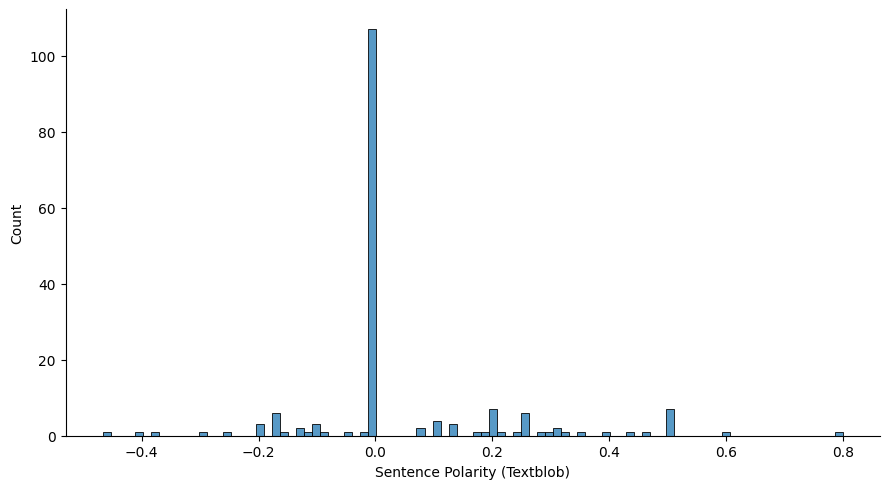

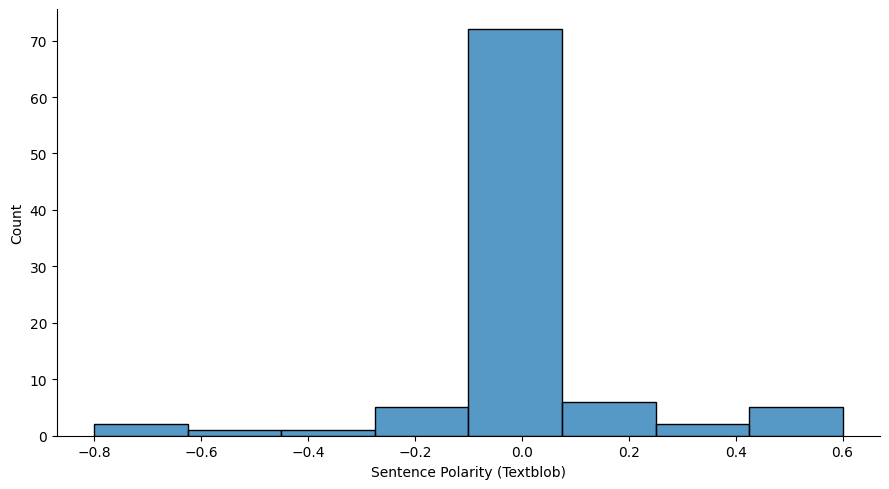

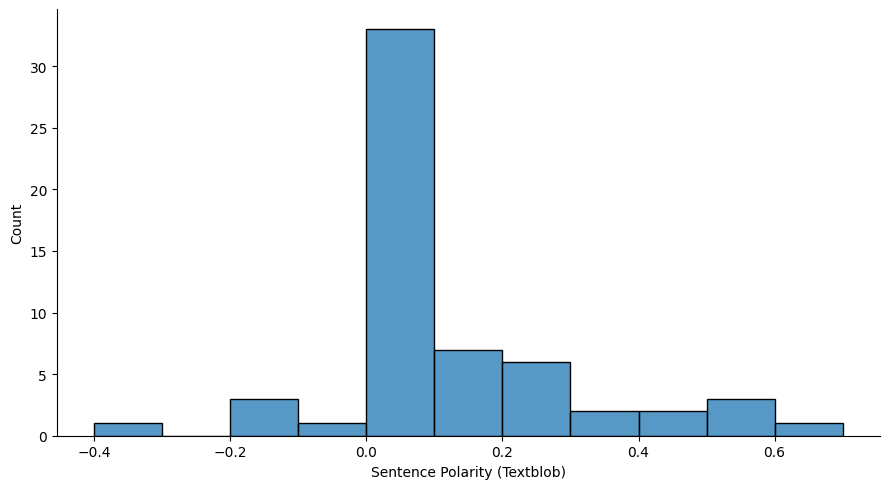

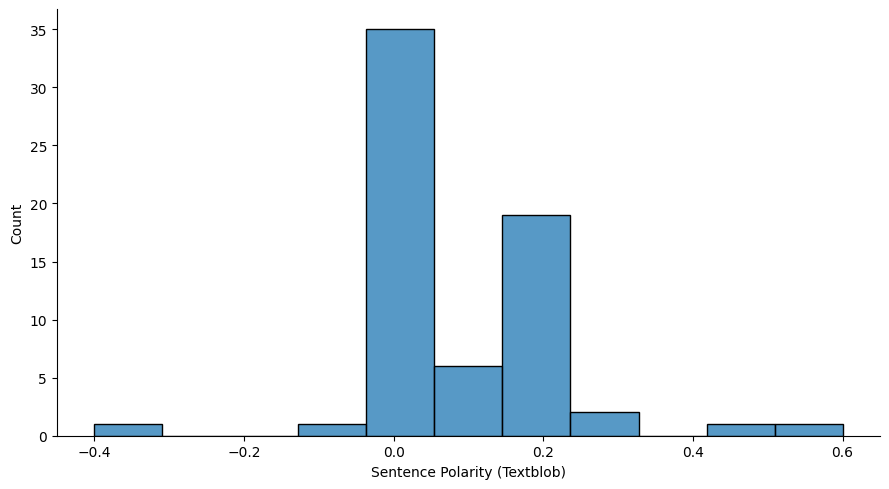

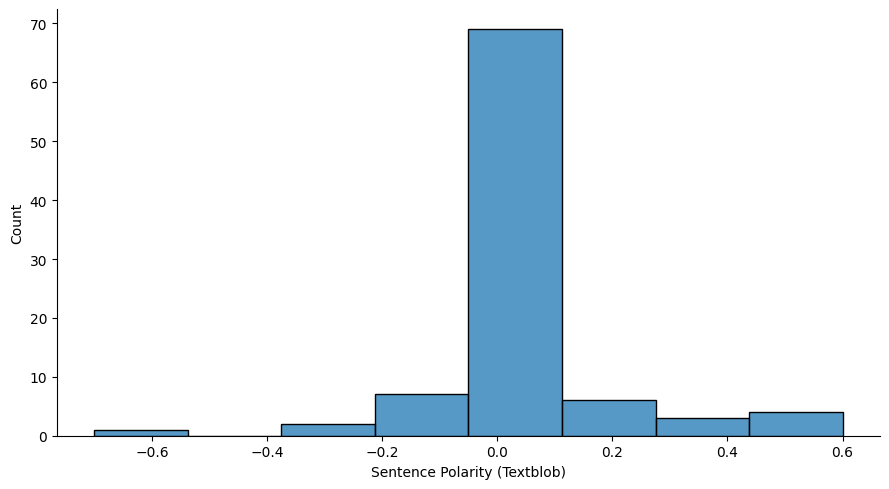

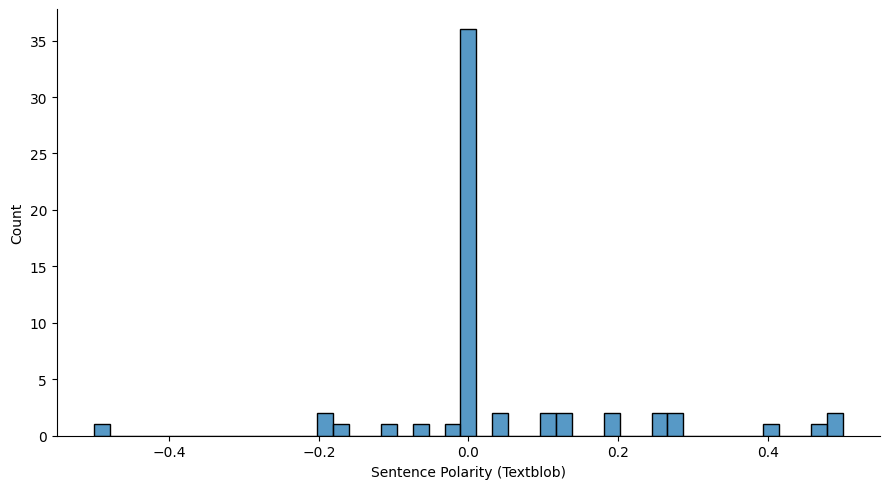

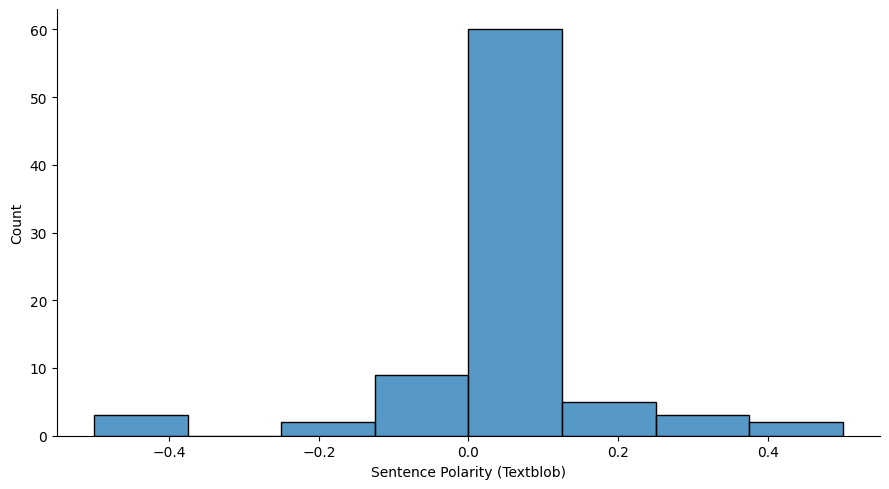

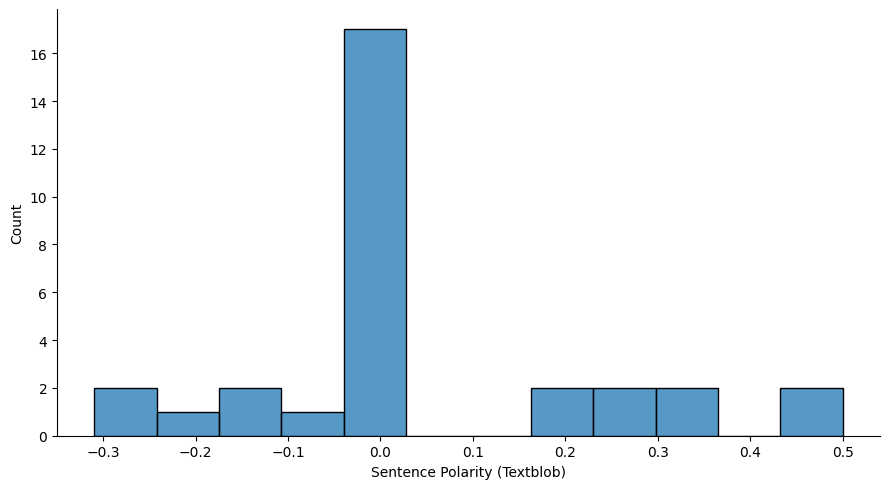

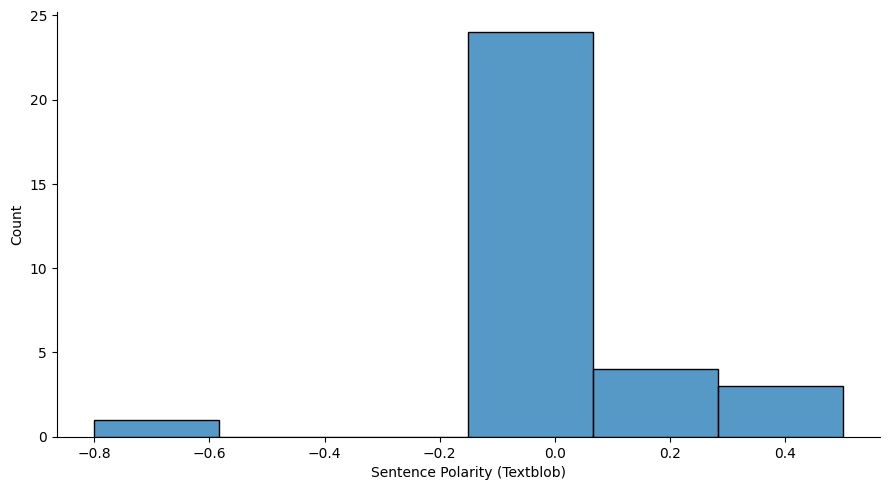

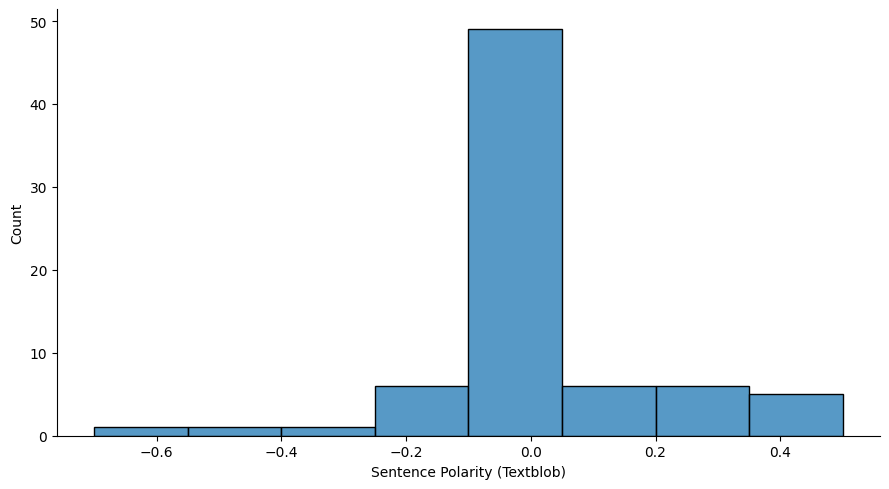

In [109]:
import requests
import nltk
from bs4 import BeautifulSoup
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import random
from wordcloud import WordCloud
import os
import spacy
nlp = spacy.load('en_core_web_sm')
from textblob import TextBlob
from pattern.en import sentiment
r.encoding = 'utf-8'
for i in range(len(links)):
  r=requests.get(links[i])
  r.encoding = 'utf-8'
  


  html = r.text



  soup = BeautifulSoup(html)

  text = soup.get_text()


  len(text)
  clean_text= text.replace("n", " ")
  clean_text= clean_text.replace("/", " ")       
  clean_text= ''.join([c for c in clean_text if c != "'"])

  clean_text
  sentence=[]
  tokens = nlp(clean_text)
  for sent in tokens.sents:
      sentence.append((sent.text.strip()))

  sentence

  textblob_sentiment=[]
  for s in sentence:
      txt= TextBlob(s)
      a= txt.sentiment.polarity
      b= txt.sentiment.subjectivity
      textblob_sentiment.append([s,a,b])

  df_textblob = pd.DataFrame(textblob_sentiment, columns =['Sentence', 'Polarity', 'Subjectivity'])

  print(links[i])

  sns.displot(df_textblob["Polarity"], height= 5, aspect=1.8)

  plt.xlabel("Sentence Polarity (Textblob)")
  pattern_sentiment=[]
  for s in sentence:
      res= sentiment(s)
      c= res[0]
      d= res[1]
      pattern_sentiment.append([s,c,d])

  pattern_sentiment[1]
  df_pattern = pd.DataFrame(textblob_sentiment, columns =['Sentence', 'Polarity', 'Subjectivity'])
  df_pattern.head()
  tokenizer = nltk.tokenize.RegexpTokenizer('w+')


  tokens = tokenizer.tokenize(clean_text)

  len(tokens)

  words = []

  for word in tokens:
      words.append(word.lower())
  stopwords = nltk.corpus.stopwords.words('english')
  words_new=[]
  for word in words:
      if word not in stopwords:
          words_new.append(word)

  len(words_new)

In [ ]:
77